In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))
from service.Classifier.DataLoader.DataLoader import DataLoader
from service.Classifier.Enums.priority import Priority
from service.Classifier.DataLoader.P2DataLoader import P2DataLoader
from service.Classifier.DataLoader.P3DataLoader import P3DataLoader
from service.Classifier.DataLoader.P4DataLoader import P4DataLoader
from service.Classifier.Model.XGBRegressionModel import XGBRegressionModel
from service.Classifier.PreProcessing.RegressionModelPreProcessor import RegressionModelPreProcessor
from service.Classifier.DataSplit.TrainTestSplit import TrainTestSplit
from service.Classifier.Enums.dataTypeEnum import DataType

/Users/fjirigesi/Documents/OOSLAClassifier/service/Classifier/Model/XGBRegressionModel.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  from pandas import np


In [2]:
def initializeByPriority(priority):
    # load new updated data via Features class
    if priority == Priority.P2.value:
        return P2DataLoader()
    elif priority == Priority.P3.value:
        return P3DataLoader()
    elif priority == Priority.P4.value:
        return P4DataLoader()
    return None

In [3]:
priority = Priority.P2.value
def extract_data(priority):
    dataLoader = initializeByPriority(priority)
    data_df = dataLoader.loadTrainingRawData()
    # split data into train test 4:1
    dataSplit = TrainTestSplit()
    train_df, test_df = dataSplit.split(data_df)

    # generate features
    train_df, feature_names = dataLoader.transformRawDataToFeatures(train_df, DataType.TRAINDATA.value)
    test_df, feature_names = dataLoader.transformRawDataToFeatures(test_df, DataType.VALIDATION.value)
    # pre-processing the data based on model type
    preprocessor = RegressionModelPreProcessor(feature_names)
    train_X, train_y, test_X, test_y = preprocessor.preprocessing(train_df, test_df)
    
    return (train_X, train_y, test_X, test_y, train_df, test_df)

In [4]:
import xgboost as xgb
import numpy as np
import pandas as pd
from service.Classifier.Enums.LabelEnum import LabelEnum
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, classification_report
from service.Classifier.PreProcessing.Utils.dataValidator import DataValidator

def evaluate_result(train_X, train_y, test_X, test_y, train_df, test_df):

    model = xgb.XGBRegressor(max_depth=5, n_estimators=100, learning_rate=0.05).fit(train_X, train_y)
    predictions = np.rint(model.predict(test_X)).astype(np.int64)
    submission = pd.DataFrame({'ID': test_df['keyID'],
                               LabelEnum.CLOSEDDAY.value: predictions, 'Actual': test_y})
    rmse = np.sqrt(mean_squared_error(predictions, test_df[LabelEnum.CLOSEDDAY.value]))
    print("RMSE: %f" % rmse)
    mae = mean_absolute_error(predictions, test_y)
    print("MAE: %f" % mae)
    DataValidator().valid(submission, priority, test_df)
    print(confusion_matrix(submission["truth"], submission["prediction"]))
    print(classification_report(submission["truth"], submission["prediction"]))
    
    return (test_y, predictions, submission["truth"], submission["prediction"], model)

In [11]:
priority = Priority.P2.value

train_X_P2, train_y_P2, test_X_P2, test_y_P2, train_df_P2, test_df_P2 = extract_data(priority)

p2_regression_true, p2_regression_pred, p2_classification_true, p2_classification_pred, p2_model = evaluate_result(train_X, train_y, test_X, test_y, train_df, test_df)

/Users/fjirigesi/anaconda3/lib/python3.8/site-packages/pymongo/common.py:781: UserWarning: The value of ssl must be 'true' or 'false'
  warnings.warn(str(exc))


The project is not in embedding: NATBEMCR
The project is not in embedding: PX
The project is not in embedding: CSCNPLAT
The project is not in embedding: GGRIP
The project is not in embedding: PROBLEM
RMSE: 24.666671
MAE: 17.535211
[[303  53]
 [ 76  65]]
              precision    recall  f1-score   support

       False       0.80      0.85      0.82       356
        True       0.55      0.46      0.50       141

    accuracy                           0.74       497
   macro avg       0.68      0.66      0.66       497
weighted avg       0.73      0.74      0.73       497



In [16]:
feature_names = train_df_P2.columns[2:10]
print(len(feature_names))
feature_names

8


Index(['chainLength', 'longTimeHold', 'lateTriageDays', 'InitialActivityCount',
       'InitialActionCount', 'recentActionCount', 'recentActivityCount',
       'projectCoverage'],
      dtype='object')

Text(0.5, 0, 'Permutation Importance on P2')

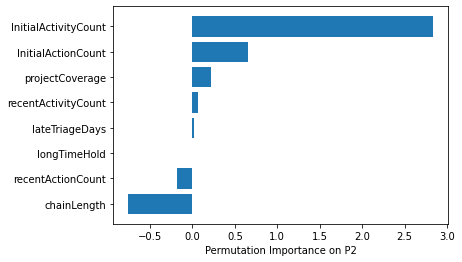

In [17]:
from matplotlib import pyplot as plt
# sorted_idx = p2_model.feature_importances_.argsort()
# plt.barh(feature_names[sorted_idx], p2_model.feature_importances_[sorted_idx])
# plt.xlabel("Xgboost buildin Feature Importance on P2")

from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(p2_model, test_X_P2, test_y_P2)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance on P2")

In [18]:
perm_importance.importances_mean[sorted_idx]

array([-0.75555716, -0.17919363,  0.        ,  0.02406158,  0.06628794,
        0.22257972,  0.64967136,  2.83068637])

In [19]:
feature_names[sorted_idx]

Index(['chainLength', 'recentActionCount', 'longTimeHold', 'lateTriageDays',
       'recentActivityCount', 'projectCoverage', 'InitialActionCount',
       'InitialActivityCount'],
      dtype='object')

## P3

In [12]:
priority = Priority.P3.value

train_X_P3, train_y_P3, test_X_P3, test_y_P3, train_df_P3, test_df_P3 = extract_data(priority)

p3_regression_true, p3_regression_pred, p3_classification_true, p3_classification_pred, p3_model = evaluate_result(train_X, train_y, test_X, test_y, train_df, test_df)

/Users/fjirigesi/anaconda3/lib/python3.8/site-packages/pymongo/common.py:781: UserWarning: The value of ssl must be 'true' or 'false'
  warnings.warn(str(exc))


The project is not in embedding: RISKVRTB
The project is not in embedding: MPPMO
The project is not in embedding: WEBRES
The project is not in embedding: WARROOM
The project is not in embedding: PROBLEM
The project is not in embedding: NRP
RMSE: 24.666671
MAE: 17.535211
[[303  53]
 [ 76  65]]
              precision    recall  f1-score   support

       False       0.80      0.85      0.82       356
        True       0.55      0.46      0.50       141

    accuracy                           0.74       497
   macro avg       0.68      0.66      0.66       497
weighted avg       0.73      0.74      0.73       497



Text(0.5, 0, 'Permutation Importance on P3')

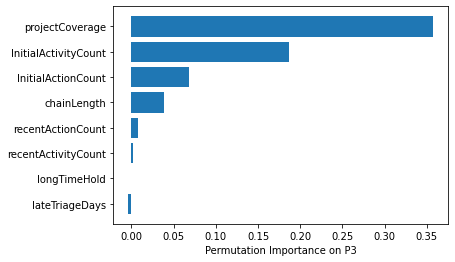

In [20]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(p3_model, test_X_P3, test_y_P3)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance on P3")

In [21]:
perm_importance.importances_mean[sorted_idx]

array([-0.00371525,  0.        ,  0.00183672,  0.0078201 ,  0.03835092,
        0.06841631,  0.18674272,  0.35681342])

In [13]:
priority = Priority.P4.value

train_X_P4, train_y_P4, test_X_P4, test_y_P4, train_df_P4, test_df_P4 = extract_data(priority)

p4_regression_true, p4_regression_pred, p4_classification_true, p4_classification_pred, p4_model = evaluate_result(train_X, train_y, test_X, test_y, train_df, test_df)

/Users/fjirigesi/anaconda3/lib/python3.8/site-packages/pymongo/common.py:781: UserWarning: The value of ssl must be 'true' or 'false'
  warnings.warn(str(exc))


The project is not in embedding: SDOCATOP
RMSE: 24.666671
MAE: 17.535211
[[303  53]
 [ 76  65]]
              precision    recall  f1-score   support

       False       0.80      0.85      0.82       356
        True       0.55      0.46      0.50       141

    accuracy                           0.74       497
   macro avg       0.68      0.66      0.66       497
weighted avg       0.73      0.74      0.73       497



Text(0.5, 0, 'Permutation Importance on P4')

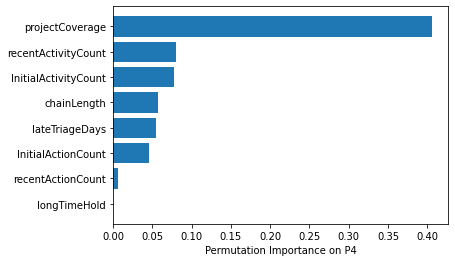

In [22]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(p4_model, test_X_P4, test_y_P4)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance on P4")

In [23]:
perm_importance.importances_mean[sorted_idx]

array([0.        , 0.00674574, 0.04533275, 0.05475302, 0.05709622,
       0.07712049, 0.08006023, 0.4059356 ])

In [9]:
# # regression results
# regression_true = pd.concat([p2_regression_true, p3_regression_true])
# regression_true = pd.concat([regression_true, p4_regression_true])

# regression_pred = np.concatenate((p2_regression_pred, p3_regression_pred), axis=0)
# regression_pred = np.concatenate((regression_pred, p4_regression_pred), axis=0)

# ## classification results
# classification_true = pd.concat([p2_classification_true, p3_classification_true])
# classification_true = pd.concat([classification_true, p4_classification_true])

# classification_pred = pd.concat([p2_classification_pred, p3_classification_pred])
# classification_pred = pd.concat([classification_pred, p4_classification_pred])

In [10]:
# print("---Dynamic Features (including Team Coverage) results on all data 25%---")
# rmse = np.sqrt(mean_squared_error(regression_pred, regression_true))
# print("RMSE: %f" % rmse)aggregate
# mae = mean_absolute_error(regression_pred, regression_true)
# print("MAE: %f" % mae)
# print(confusion_matrix(classification_true, classification_pred))
# print(classification_report(classification_true, classification_pred))